In [155]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
%matplotlib inline

In [156]:
#training = pd.read_csv('training_data.csv', encoding = "latin")
training = pd.read_csv('cloudTrain.csv')

In [157]:
training.shape

(6812, 14)

In [158]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,AVERAGE_RAIN,AVERAGE_CLOUDINESS
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,0.0,NOTHING,nuvens quebradas
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,0.0,NOTHING,céu limpo
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,0.0,NOTHING,céu limpo
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,0.0,NOTHING,céu limpo
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,0.0,NOTHING,nuvens quebradas


In [159]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_PRECIPITATION    6812 non-null   float64
 12  AVERAGE_RAIN             6812 non-null   object 
 13  AVERAGE_CLOUDINESS       6812 non-null   object 
dtypes: float64(8), object(6)

In [160]:
training['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [161]:
training['AVERAGE_SPEED_DIFF'] = training['AVERAGE_SPEED_DIFF'].astype('category')

In [162]:
training['city_name'].value_counts()

Porto    6812
Name: city_name, dtype: int64

In [163]:
training['LUMINOSITY'].value_counts()

LIGHT        3293
DARK         3253
LOW_LIGHT     266
Name: LUMINOSITY, dtype: int64

In [164]:
training['AVERAGE_CLOUDINESS'].value_counts()

nuvens quebradas     3175
céu limpo            2378
céu pouco nublado    1014
nublado               245
Name: AVERAGE_CLOUDINESS, dtype: int64

In [165]:
training['AVERAGE_RAIN'].value_counts()

NOTHING                        6249
chuva fraca                     261
chuva moderada                  153
chuva leve                       45
aguaceiros fracos                38
chuva                            30
aguaceiros                       11
chuva forte                       8
trovoada com chuva leve           7
chuvisco fraco                    5
chuva de intensidade pesado       2
chuva de intensidade pesada       1
trovoada com chuva                1
chuvisco e chuva fraca            1
Name: AVERAGE_RAIN, dtype: int64

In [166]:
training.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


In [167]:
trainingWork = training.copy()

In [168]:
trainingWork['record_date'] = pd.to_datetime(trainingWork['record_date'])

trainingWork['weekday'] = trainingWork['record_date'].dt.dayofweek
trainingWork['hour'] = trainingWork['record_date'].dt.hour
trainingWork['month'] = trainingWork['record_date'].dt.month
#training['year'] = training['record_date'].dt.year
#training['day'] = training['record_date'].dt.day

In [169]:
#trainingWork = trainingWork.drop(['city_name','record_date','AVERAGE_PRECIPITATION'],axis=1)

In [170]:
#sns.pairplot(trainingWork)

Prediction Target:

 2   AVERAGE_SPEED_DIFF       6812 non-null   object 

Possibilities:

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
 

Features:

 0   city_name                6812 non-null   object 
 
 1   record_date              6812 non-null   object ----> All the same value 'Porto' -> Remove

 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64


 6   LUMINOSITY               6812 non-null   object ----> categorical
LIGHT        3293
DARK         3253
LOW_LIGHT     266


 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64

 11  AVERAGE_CLOUDINESS       4130 non-null   object
céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67

Missing data -> 39.4% ---> Mode? Removal? over/under Fitting?

 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64 --> All same values -> Remove
 
 13  AVERAGE_RAIN             563 non-null    object 
chuva fraca                    261
chuva moderada                 153
chuva leve                      45
aguaceiros fracos               38
chuva                           30
aguaceiros                      11
chuva forte                      8
trovoada com chuva leve          7
chuvisco fraco                   5
chuva de intensidade pesado      2
chuva de intensidade pesada      1
trovoada com chuva               1
chuvisco e chuva fraca           1

Missing data -> 91.7% ----> Removal

In [171]:
corr = trainingWork.copy()

corr['AVERAGE_RAIN']=corr['AVERAGE_RAIN'].astype('category').cat.codes
corr['AVERAGE_RAIN'].sort_values(ascending=False)

corr['AVERAGE_CLOUDINESS']=corr['AVERAGE_CLOUDINESS'].astype('category').cat.codes
corr['AVERAGE_CLOUDINESS'].sort_values(ascending=False)

corr['AVERAGE_SPEED_DIFF']=corr['AVERAGE_SPEED_DIFF'].astype('category').cat.codes
corr['AVERAGE_SPEED_DIFF'].sort_values(ascending=False)

corr['LUMINOSITY']=corr['LUMINOSITY'].astype('category').cat.codes
corr['LUMINOSITY'].sort_values(ascending=False)



2396    2
6185    2
2072    2
2078    2
4049    2
       ..
4105    0
4106    0
4107    0
4109    0
6811    0
Name: LUMINOSITY, Length: 6812, dtype: int8

<AxesSubplot:>

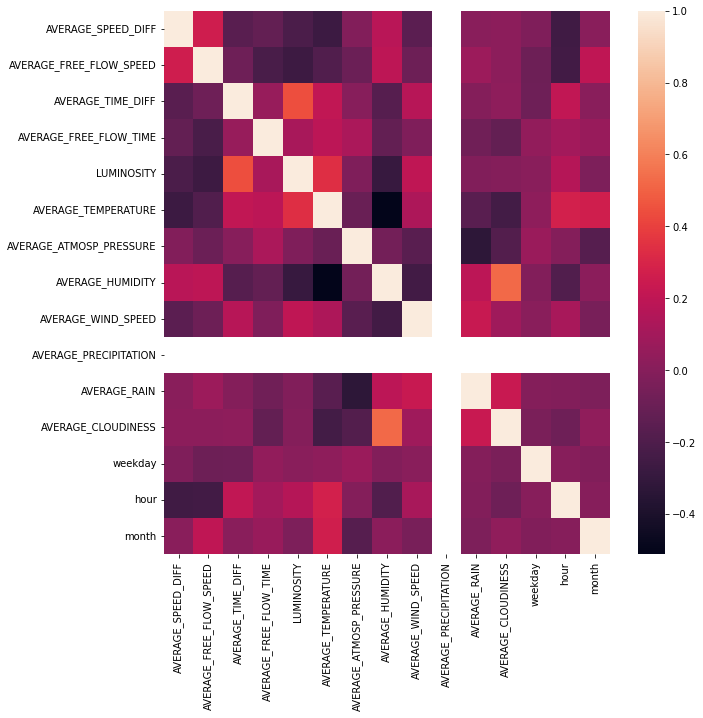

In [172]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr.corr())

In [173]:
#trainingWork['AVERAGE_WIND_SPEED'] = np.log(trainingWork.AVERAGE_WIND_SPEED+1)
#trainingWork['AVERAGE_TIME_DIFF'] = np.log(trainingWork.AVERAGE_TIME_DIFF+1)


Numerical values:  

AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64  
AVERAGE_TIME_DIFF        6812 non-null   float64  
AVERAGE_FREE_FLOW_TIME   6812 non-null   float64  
AVERAGE_TEMPERATURE      6812 non-null   float64  
AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64  
AVERAGE_HUMIDITY         6812 non-null   float64  
AVERAGE_WIND_SPEED       6812 non-null   float64  
AVERAGE_PRECIPITATION    6812 non-null   float64  
weekday                  6812 non-null   int64    
hour                     6812 non-null   int64    
month                    6812 non-null   int64    

Categorical Values  
city_name                6812 non-null   object  
record_date              6812 non-null   object  
AVERAGE_SPEED_DIFF       6812 non-null   object   
LUMINOSITY               6812 non-null   object   
AVERAGE_CLOUDINESS       4130 non-null   object   
AVERAGE_RAIN             563 non-null    object   

In [174]:
df_num = trainingWork[['AVERAGE_FREE_FLOW_SPEED','AVERAGE_TIME_DIFF','AVERAGE_FREE_FLOW_TIME','AVERAGE_TEMPERATURE','AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_WIND_SPEED','AVERAGE_PRECIPITATION','weekday','hour','month']]

df_cat = trainingWork[['AVERAGE_SPEED_DIFF','LUMINOSITY','AVERAGE_CLOUDINESS','AVERAGE_RAIN']]

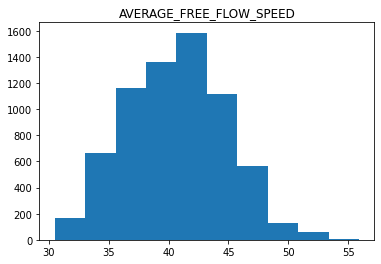

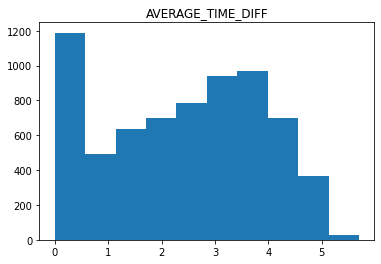

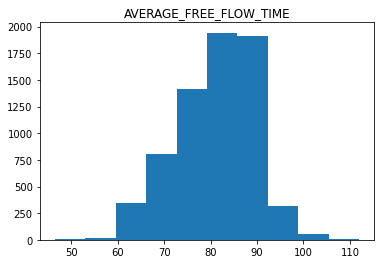

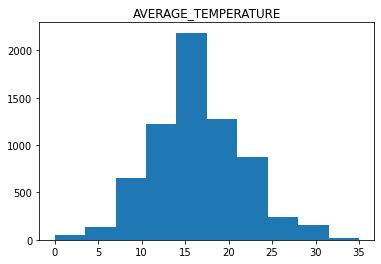

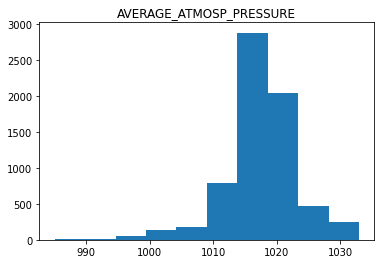

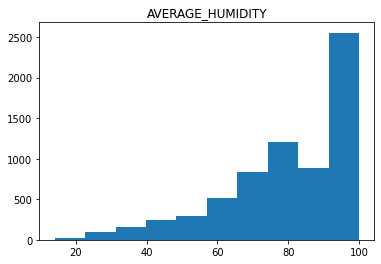

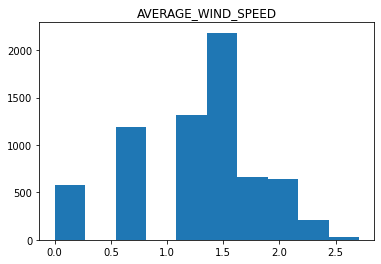

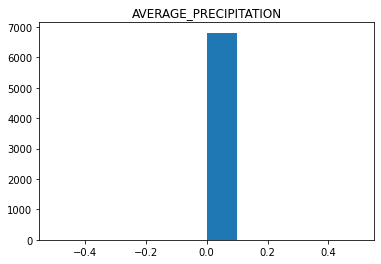

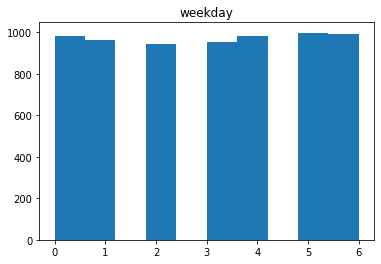

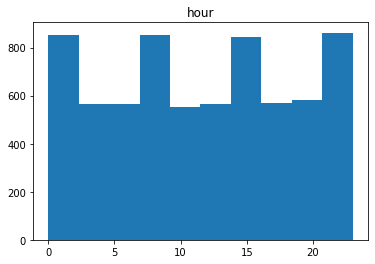

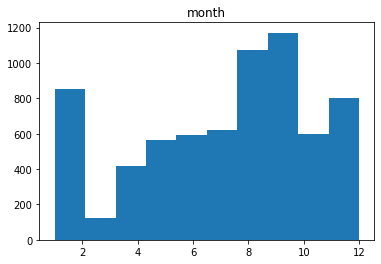

In [175]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

                         AVERAGE_FREE_FLOW_SPEED  AVERAGE_TIME_DIFF  \
AVERAGE_FREE_FLOW_SPEED                 1.000000          -0.255706   
AVERAGE_TIME_DIFF                      -0.255706           1.000000   
AVERAGE_FREE_FLOW_TIME                 -0.219890           0.141858   
AVERAGE_TEMPERATURE                    -0.192325           0.357415   
AVERAGE_ATMOSP_PRESSURE                -0.093648           0.010990   
AVERAGE_HUMIDITY                        0.191598          -0.267354   
AVERAGE_WIND_SPEED                     -0.125981           0.258431   
AVERAGE_PRECIPITATION                        NaN                NaN   
weekday                                -0.087912          -0.064558   
hour                                   -0.247337           0.354853   
month                                   0.200550           0.016600   

                         AVERAGE_FREE_FLOW_TIME  AVERAGE_TEMPERATURE  \
AVERAGE_FREE_FLOW_SPEED               -0.219890            -0.192325   
AVE

<AxesSubplot:>

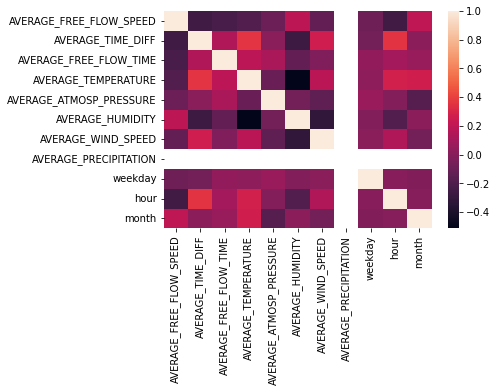

In [176]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [177]:
pd.pivot_table(trainingWork, index= 'AVERAGE_SPEED_DIFF', values=df_num)

,AVERAGE_ATMOSP_PRESSURE,AVERAGE_FREE_FLOW_SPEED,AVERAGE_FREE_FLOW_TIME,AVERAGE_HUMIDITY,AVERAGE_PRECIPITATION,AVERAGE_TEMPERATURE,AVERAGE_TIME_DIFF,AVERAGE_WIND_SPEED,hour,month,weekday
AVERAGE_SPEED_DIFF,,,,,,,,,,,
High,1017.357479,39.588147,82.376952,73.802916,0.0,18.632173,4.052601,1.458669,14.806209,7.038570,2.713076
Low,1017.498238,40.480479,80.716561,81.341790,0.0,16.227625,2.164453,1.245148,11.643411,7.096547,3.418605
Medium,1017.431254,38.831617,83.270139,74.528770,0.0,17.992732,3.187422,1.372534,13.711084,7.057541,2.943065
None,1017.417273,41.874818,80.205182,86.367273,0.0,13.888182,0.638766,1.047385,8.310909,7.120000,3.155455
Very_High,1016.847599,44.307307,76.656994,80.588727,0.0,15.066806,4.524040,1.317091,11.254697,7.144050,2.200418


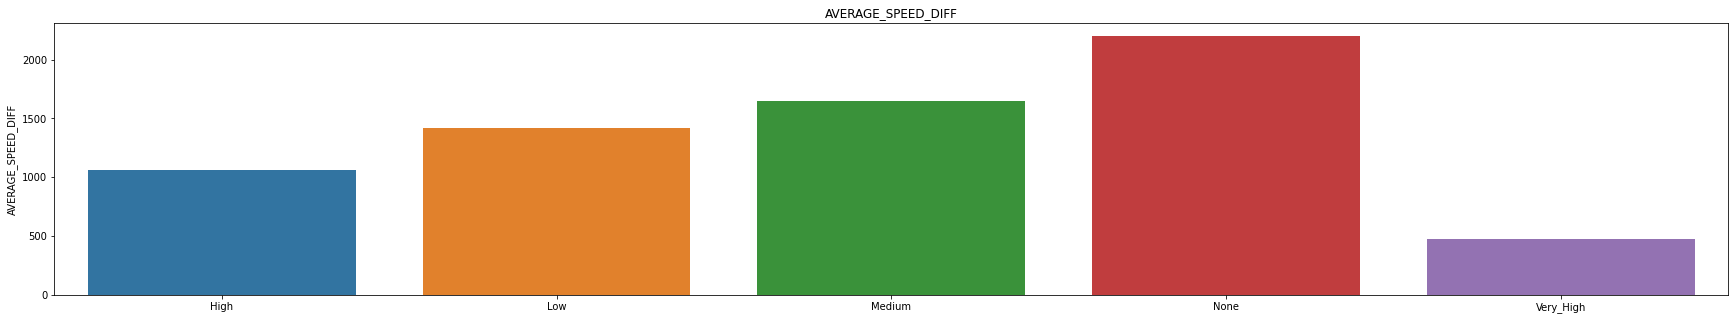

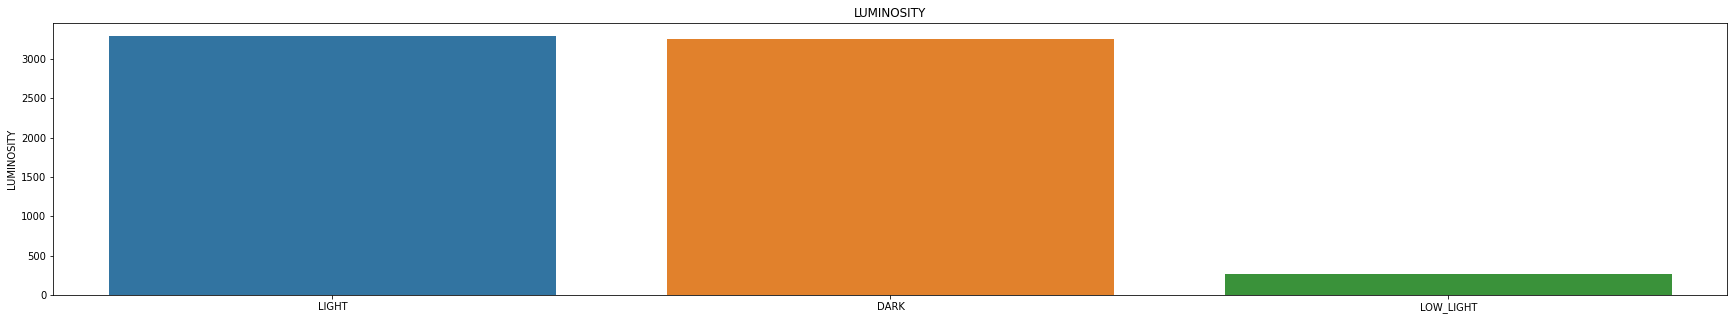

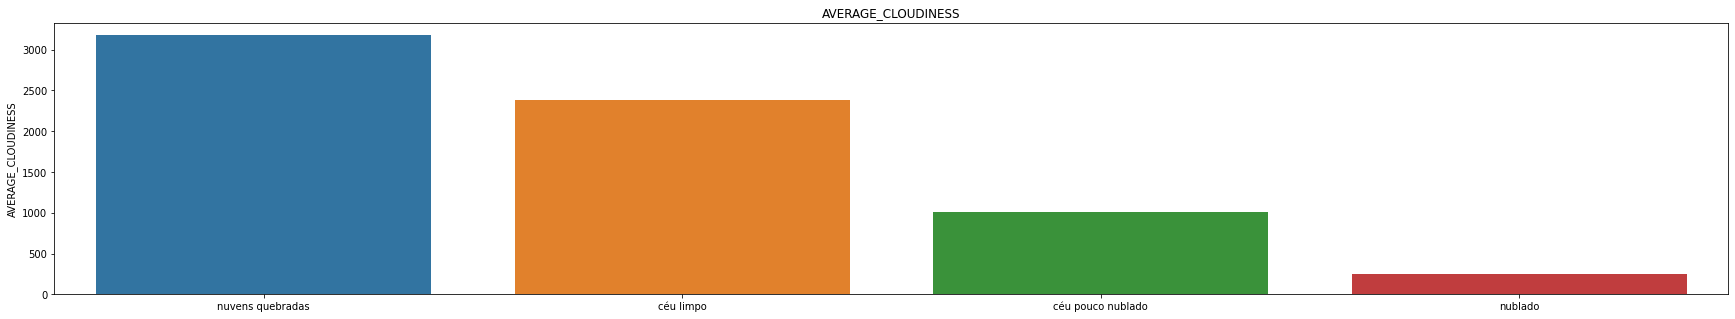

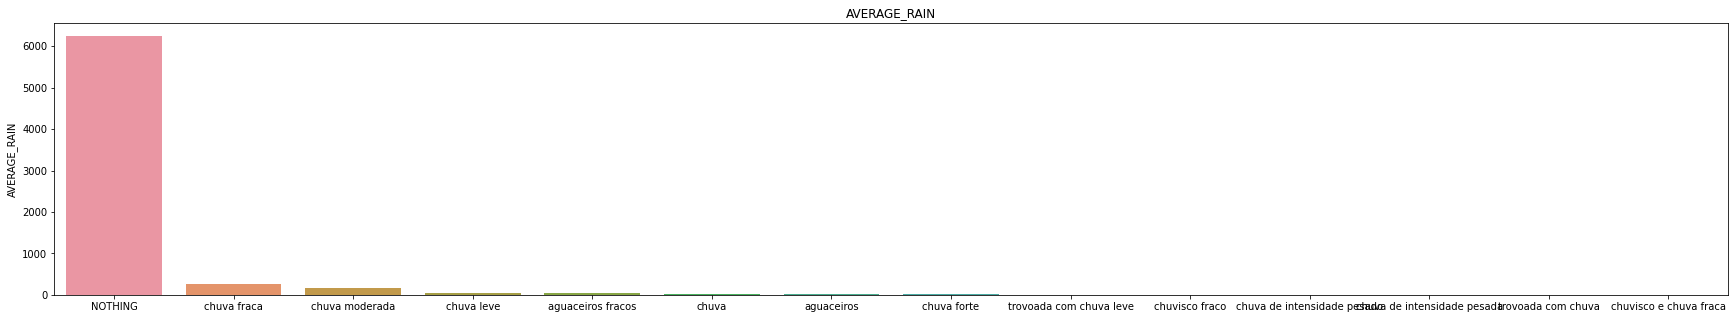

In [178]:
for i in df_cat.columns:
    fig, ax = plt.subplots(figsize=(30,5))
    sns.barplot(x=df_cat[i].value_counts().index,y= df_cat[i].value_counts()).set_title(i)
    plt.show()

In [179]:


# Compare Speed Diff and each of these categorical variables 

print(pd.pivot_table(trainingWork, index = 'AVERAGE_SPEED_DIFF', columns = 'LUMINOSITY', values='month' ,aggfunc ='count'))
print()
print(pd.pivot_table(trainingWork, index = 'AVERAGE_SPEED_DIFF', columns = 'AVERAGE_CLOUDINESS', values='month' ,aggfunc ='count'))
print()
print(pd.pivot_table(trainingWork, index = 'AVERAGE_SPEED_DIFF', columns = 'AVERAGE_RAIN',values='month',aggfunc ='count'))



LUMINOSITY          DARK  LIGHT  LOW_LIGHT
AVERAGE_SPEED_DIFF                        
High                 149    877         37
Low                  840    518         61
Medium               330   1256         65
None                1897    237         66
Very_High             37    405         37

AVERAGE_CLOUDINESS  céu limpo  céu pouco nublado  nublado  nuvens quebradas
AVERAGE_SPEED_DIFF                                                         
High                      308                269       14               472
Low                       499                209       64               647
Medium                    554                315       32               750
None                      897                136      124              1043
Very_High                 120                 85       11               263

AVERAGE_RAIN        NOTHING  aguaceiros  aguaceiros fracos  chuva  \
AVERAGE_SPEED_DIFF                                                  
High                    980

In [180]:
#trainingWork['AVERAGE_CLOUDINESS'] = trainingWork['AVERAGE_CLOUDINESS'].fillna(trainingWork['AVERAGE_CLOUDINESS'].mode()[0])
#trainingWork['AVERAGE_CLOUDINESS'] = trainingWork['AVERAGE_CLOUDINESS'].fillna('Not Available')

In [181]:
trainingWork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city_name                6812 non-null   object        
 1   record_date              6812 non-null   datetime64[ns]
 2   AVERAGE_SPEED_DIFF       6812 non-null   category      
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64       
 4   AVERAGE_TIME_DIFF        6812 non-null   float64       
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64       
 6   LUMINOSITY               6812 non-null   object        
 7   AVERAGE_TEMPERATURE      6812 non-null   float64       
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64       
 9   AVERAGE_HUMIDITY         6812 non-null   float64       
 10  AVERAGE_WIND_SPEED       6812 non-null   float64       
 11  AVERAGE_PRECIPITATION    6812 non-null   float64       
 12  AVERAGE_RAIN             6812 non-

In [182]:
#trainingWorkDropCloudNa = trainingWork[trainingWork['AVERAGE_CLOUDINESS'].notna()]

In [183]:
#trainingWorkDropCloudNa.info()

In [184]:

df_dummies = trainingWork[['LUMINOSITY','AVERAGE_CLOUDINESS']]

In [185]:
dummied = trainingWork.copy()

In [186]:
for i in df_dummies:
    dummied = pd.concat([dummied,pd.get_dummies(dummied[i])],axis='columns').drop([i],axis='columns')

In [187]:
dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city_name                6812 non-null   object        
 1   record_date              6812 non-null   datetime64[ns]
 2   AVERAGE_SPEED_DIFF       6812 non-null   category      
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64       
 4   AVERAGE_TIME_DIFF        6812 non-null   float64       
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64       
 6   AVERAGE_TEMPERATURE      6812 non-null   float64       
 7   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64       
 8   AVERAGE_HUMIDITY         6812 non-null   float64       
 9   AVERAGE_WIND_SPEED       6812 non-null   float64       
 10  AVERAGE_PRECIPITATION    6812 non-null   float64       
 11  AVERAGE_RAIN             6812 non-null   object        
 12  weekday                  6812 non-

In [188]:
finalTrain = dummied.drop(['city_name','record_date','AVERAGE_RAIN','AVERAGE_PRECIPITATION'],axis=1)

In [189]:
finalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AVERAGE_SPEED_DIFF       6812 non-null   category
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64 
 2   AVERAGE_TIME_DIFF        6812 non-null   float64 
 3   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64 
 4   AVERAGE_TEMPERATURE      6812 non-null   float64 
 5   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 6   AVERAGE_HUMIDITY         6812 non-null   float64 
 7   AVERAGE_WIND_SPEED       6812 non-null   float64 
 8   weekday                  6812 non-null   int64   
 9   hour                     6812 non-null   int64   
 10  month                    6812 non-null   int64   
 11  DARK                     6812 non-null   uint8   
 12  LIGHT                    6812 non-null   uint8   
 13  LOW_LIGHT                6812 non-null   uint8   
 14  céu limp

In [190]:
finalTrain['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [191]:
#finalTrain['AVERAGE_SPEED_DIFF'] = finalTrain['AVERAGE_SPEED_DIFF'].map(lambda x: '0' if 'None' in x else "1" if 'Low' in x else '2' if 'Medium' in x else '4' if 'Very_High' in x else '3' if 'Very' in x else "")

#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'None', 'AVERAGE_SPEED_DIFF'] = 0
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'Low', 'AVERAGE_SPEED_DIFF'] = 1
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'Medium', 'AVERAGE_SPEED_DIFF'] = 2
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'High', 'AVERAGE_SPEED_DIFF'] = 3
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'Very_High', 'AVERAGE_SPEED_DIFF'] = 4

In [192]:
finalTrain['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [193]:
finalTrain = finalTrain.reindex(sorted(finalTrain.columns), axis=1)

In [194]:
finalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64 
 2   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64 
 3   AVERAGE_HUMIDITY         6812 non-null   float64 
 4   AVERAGE_SPEED_DIFF       6812 non-null   category
 5   AVERAGE_TEMPERATURE      6812 non-null   float64 
 6   AVERAGE_TIME_DIFF        6812 non-null   float64 
 7   AVERAGE_WIND_SPEED       6812 non-null   float64 
 8   DARK                     6812 non-null   uint8   
 9   LIGHT                    6812 non-null   uint8   
 10  LOW_LIGHT                6812 non-null   uint8   
 11  céu limpo                6812 non-null   uint8   
 12  céu pouco nublado        6812 non-null   uint8   
 13  hour                     6812 non-null   int64   
 14  month   

In [195]:

X = finalTrain.drop(['AVERAGE_SPEED_DIFF'],axis=1)

y = finalTrain['AVERAGE_SPEED_DIFF']


In [196]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE

In [197]:
#sampling_strategy = "not majority"
#ros = RandomOverSampler(sampling_strategy=sampling_strategy)
#X_res, y_res = ros.fit_resample(X, y)
#y_res.value_counts()

In [198]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=2021,stratify=y)

In [199]:
smote = SMOTE()

In [200]:
sm = BorderlineSMOTE(random_state=2021,kind='borderline-1')
X_res, y_res = sm.fit_resample(X_train, y_train)

<AxesSubplot:ylabel='AVERAGE_SPEED_DIFF'>

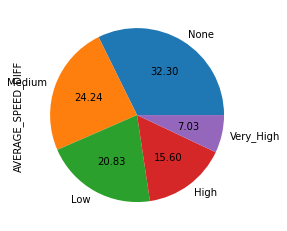

In [201]:
y_train.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='AVERAGE_SPEED_DIFF'>

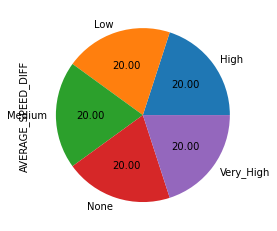

In [202]:
y_res.value_counts().plot.pie(autopct='%.2f')

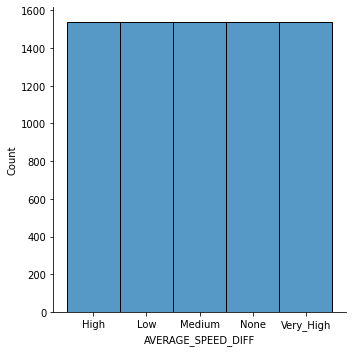

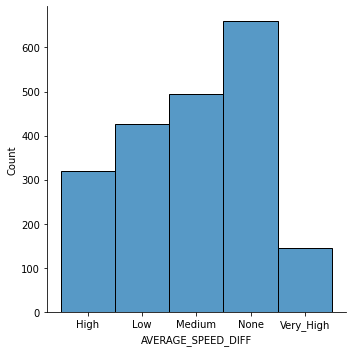

In [203]:
sns.displot(y_res)
sns.displot(y_test)

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [205]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.60714286 0.61688312 0.66493506 0.66428571 0.6461039 ]
0.6398701298701298


In [207]:
lr = LogisticRegression(random_state=2021,max_iter = 90000000000000)
cv = cross_val_score(lr,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

KeyboardInterrupt: 

In [208]:
dt = tree.DecisionTreeClassifier(random_state=2021)
cv = cross_val_score(dt,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.76753247 0.80714286 0.8012987  0.84545455 0.8525974 ]
0.8148051948051949


In [209]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_res.values,y_res.values,cv=5)
print(cv)
print(cv.mean())

[0.6512987  0.65519481 0.66298701 0.71883117 0.78766234]
0.6951948051948051


In [210]:
rf = RandomForestClassifier(random_state=2021)
cv = cross_val_score(rf,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.83376623 0.86233766 0.86168831 0.9025974  0.93051948]
0.8781818181818182


In [211]:
svc = SVC(probability = True,random_state=2021)
cv = cross_val_score(svc,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.28246753 0.26428571 0.27207792 0.26623377 0.25194805]
0.2674025974025974


In [212]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2021)
cv = cross_val_score(xgb,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

/home/krow/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/krow/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/krow/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/krow/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/krow/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.82792208 0.85909091 0.8461039  0.89545455 0.92207792]
0.8701298701298702


In [213]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [214]:
#cv = cross_val_score(voting_clf,X_res.values,y_res.values,cv=5)
#print(cv)
#print(cv.mean())

In [215]:
#lr.fit(X_res,y_res)
dt.fit(X_res,y_res)
knn.fit(X_res,y_res)
rf.fit(X_res,y_res)
xgb.fit(X_res,y_res)

/home/krow/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2021, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [216]:
predictions = rf.predict(X_test)

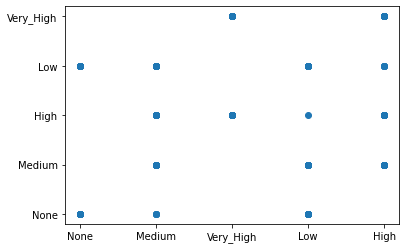

In [217]:
plt.scatter(y_test,predictions)

In [218]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [219]:
#ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

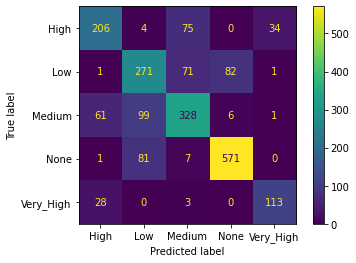

In [220]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

/home/krow/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


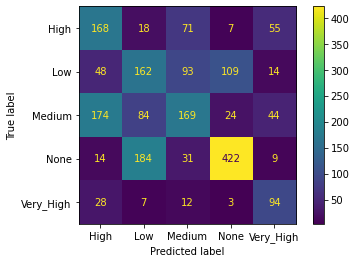

In [221]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

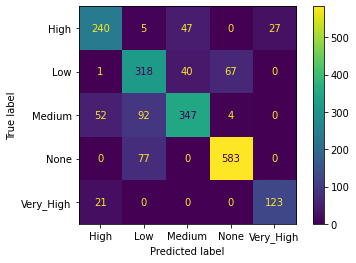

In [222]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

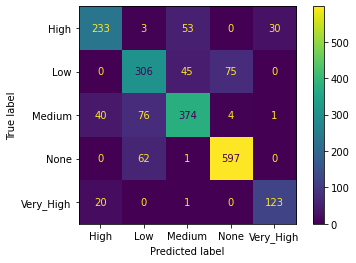

In [223]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [228]:
testing = pd.read_csv('workedTesting.csv')

In [229]:
finalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64 
 2   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64 
 3   AVERAGE_HUMIDITY         6812 non-null   float64 
 4   AVERAGE_SPEED_DIFF       6812 non-null   category
 5   AVERAGE_TEMPERATURE      6812 non-null   float64 
 6   AVERAGE_TIME_DIFF        6812 non-null   float64 
 7   AVERAGE_WIND_SPEED       6812 non-null   float64 
 8   DARK                     6812 non-null   uint8   
 9   LIGHT                    6812 non-null   uint8   
 10  LOW_LIGHT                6812 non-null   uint8   
 11  céu limpo                6812 non-null   uint8   
 12  céu pouco nublado        6812 non-null   uint8   
 13  hour                     6812 non-null   int64   
 14  month   

In [230]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 1   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 3   AVERAGE_HUMIDITY         1500 non-null   float64
 4   AVERAGE_TEMPERATURE      1500 non-null   float64
 5   AVERAGE_TIME_DIFF        1500 non-null   float64
 6   AVERAGE_WIND_SPEED       1500 non-null   float64
 7   DARK                     1500 non-null   int64  
 8   LIGHT                    1500 non-null   int64  
 9   LOW_LIGHT                1500 non-null   int64  
 10  cÃ©u limpo               1500 non-null   int64  
 11  cÃ©u pouco nublado       1500 non-null   int64  
 12  hour                     1500 non-null   int64  
 13  month                    1500 non-null   int64  
 14  nublado                 

In [231]:
prediction = rf.predict(testing)

/home/krow/.local/lib/python3.8/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cÃ©u limpo
- cÃ©u pouco nublado
Feature names seen at fit time, yet now missing:
- céu limpo
- céu pouco nublado

  warnings.warn(message, FutureWarning)


In [ ]:
sub_df = pd.read_csv('example_submission.csv')
final_data = {'RowId': sub_df.RowId, 'Speed_Diff': prediction}
submission = pd.DataFrame(data=final_data)

In [ ]:
submission['Speed_Diff'].value_counts()

None         472
Low          335
Medium       316
High         275
Very_High    102
Name: Speed_Diff, dtype: int64

In [ ]:
#pred = pd.DataFrame(prediction)
#sub_df = pd.read_csv('example_submission.csv')
#datasets=pd.concat([sub_df['RowId'],pred],axis=1)
#datasets.columns=['RowId','Speed_Diff']
#datasets

In [ ]:
compare = pd.read_csv('sample_submission.csv')

In [ ]:
compare['Speed_Diff'].value_counts()

None         500
Medium       337
Low          308
High         265
Very_High     90
Name: Speed_Diff, dtype: int64

In [ ]:
df1 = np.where(submission['Speed_Diff'] == compare['Speed_Diff'], 'True', 'False')
df1 = pd.DataFrame(df1)
df1.columns=['equals']
df1.value_counts()

equals
True      1359
False      141
dtype: int64

In [ ]:
submission.to_csv('submission.csv',index=False)